## Practical Use  for Visual Promotion Condition Trading Analysis

---

### Problem Context: Promotion Abuse

- Many brokers offer **promotions**: welcome bonuses, cashback, trade-to-unlock campaigns;
- These mechanics are designed to **increase trading activity**, not to allow **risk-free extraction**;
- However, some clients engage in **structured behavior** to:
  - Trigger a loss to meet promo conditions;
  - Wait for the bonus to unlock;
  - Reverse the position and capture a **riskless or engineered profit**.

This behavior often leads to **net loss for the broker**, especially if **intensity is artificially self-reinforced**.


To detect such manipulative behavior, we employ a **two-dimensional Hawkes Stochastic process**. This self-exciting point process effectively models mutually reinforcing trade events across instruments or accounts. By capturing abnormal clustering of trade directions, **the model helps to identify patterns consistent with dishonest, fake-hedged trading intended to exploit promotional mechanics.**

# Advanced Mathematical Formalization with Bivariate Point Hawkes Stochastic Process

---

## 1. Bivariate Point Process Definition

We consider a filtered probability space:

$$(\Omega, \mathcal{F}, \{\mathcal{F}_t\}_{t \ge 0}, \mathbb{P})$$

with usual conditions: $\{\mathcal{F}_t\}$ is right-continuous and complete.

Let $\boldsymbol{N}(t) = \begin{bmatrix} N^{(0)}(t) \\ N^{(1)}(t) \end{bmatrix}$ be a **bivariate counting process** where:
- $N^{(0)}(t)$: number of **loss-triggering events** up to time $t$,
- $N^{(1)}(t)$: number of **profit-triggering events** up to time $t$.

Each $N^{(i)}(t)$ is assumed to admit an $\mathcal{F}_t$-predictable intensity process $\lambda^{(i)}(t)$ such that:

$$
\mathbb{E}[N^{(i)}(t)] = \mathbb{E}\left[ \int_0^t \lambda^{(i)}(s) \, ds \right], \quad i \in \{0, 1\}
$$

---

## 2. Coupled Intensity Functions: Volterra Integral Equations

The process is governed by the **second-kind Volterra equations**:

$$
\lambda^{(i)}(t) = \mu_i + \sum_{j=0}^1 \int_0^{t^-} \phi_{i,j}(t - s) \, dN^{(j)}(s), \quad i \in \{0, 1\}
$$

This gives the explicit system:

\begin{align*}
\lambda^{(0)}(t) &= \mu_0 + \int_0^{t^-} \phi_{0,0}(t - s) \, dN^{(0)}(s) + \int_0^{t^-} \phi_{0,1}(t - s) \, dN^{(1)}(s) \\
\lambda^{(1)}(t) &= \mu_1 + \int_0^{t^-} \phi_{1,0}(t - s) \, dN^{(0)}(s) + \int_0^{t^-} \phi_{1,1}(t - s) \, dN^{(1)}(s)
\end{align*}

Interpretation:
- $\phi_{i,j}(t)$ encodes **influence of past $j$-events** on intensity $\lambda^{(i)}$ at time $t$.
- Diagonal terms: **self-excitation**.
- Off-diagonal terms: **mutual excitation**.

---

## 3. Exponential Memory Kernels: Parameterization

Assume **exponential kernels**:

$$
\phi_{i,j}(t) = \alpha_{i,j} e^{-\beta t} \cdot \mathbb{I}_{t > 0}
$$

Define matrix notation:

- Intensity vector: $\boldsymbol{\lambda}(t) = \begin{bmatrix} \lambda^{(0)}(t) \\ \lambda^{(1)}(t) \end{bmatrix}$
- Baseline vector: $\boldsymbol{\mu} = \begin{bmatrix} \mu_0 \\ \mu_1 \end{bmatrix}$
- Excitation matrix:

$$
\boldsymbol{\alpha} = 
\begin{bmatrix}
\alpha_{0,0} & \alpha_{0,1} \\
\alpha_{1,0} & \alpha_{1,1}
\end{bmatrix}
$$

Then the intensity system becomes:

$$
\boldsymbol{\lambda}(t) = \boldsymbol{\mu} + \int_0^{t^-} e^{-\beta (t - s)} \cdot \boldsymbol{\alpha} \, d\boldsymbol{N}(s)
$$

Or in convolution form:

$$
\boldsymbol{\lambda}(t) = \boldsymbol{\mu} + (\Phi * d\boldsymbol{N})(t)
$$

where $\Phi(t) = \boldsymbol{\alpha} e^{-\beta t} \mathbb{I}_{t > 0}$.

---

## 4. Likelihood Function Derivation (Log-Likelihood)

Given observed events $\{t_k^{(i)}\}_{k=1}^{n_i}$ for $i = 0,1$ over interval $[0,T]$, the likelihood is:

$$
\mathcal{L}(\theta) = \prod_{i=0}^1 \left( \prod_{k=1}^{n_i} \lambda^{(i)}(t_k^{(i)}) \right) \cdot \exp\left( - \int_0^T \lambda^{(i)}(t) \, dt \right)
$$

Taking logarithm:

$$
\log \mathcal{L}(\theta) = \sum_{i=0}^1 \left[ \sum_{k=1}^{n_i} \log \lambda^{(i)}(t_k^{(i)}) - \int_0^T \lambda^{(i)}(t) \, dt \right]
$$

**Integral term evaluation** under exponential kernel:

Using:

$$
\lambda^{(i)}(t) = \mu_i + \sum_{j=0}^1 \alpha_{i,j} \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})}
$$

Then:

\begin{align*}
\int_0^T \lambda^{(i)}(t) dt &= \mu_i T + \sum_{j=0}^1 \alpha_{i,j} \sum_{t_k^{(j)} < T} \int_{t = t_k^{(j)}}^T e^{-\beta (t - t_k^{(j)})} dt \\
&= \mu_i T + \sum_{j=0}^1 \frac{\alpha_{i,j}}{\beta} \sum_{t_k^{(j)} < T} \left(1 - e^{-\beta (T - t_k^{(j)})} \right)
\end{align*}

---

## 5. MLE Estimation: Likelihood and Gradient Derivation

We consider a bivariate point process $\boldsymbol{N}(t) = \begin{bmatrix} N^{(0)}(t) \\ N^{(1)}(t) \end{bmatrix}$ with $\mathcal{F}_t$-predictable intensity functions $\lambda^{(i)}(t)$.

Let $\{t_k^{(i)}\}_{k=1}^{n_i}$ denote the observed jump times of component $i \in \{0,1\}$ on time interval $[0, T]$.

---

###  Likelihood Function

The **likelihood** of observing this realization under intensities $\lambda^{(i)}(t)$ is given by the product of likelihoods over dimensions:

$$
\mathcal{L}(\theta) = 
\prod_{i=0}^1
\left[
\left( \prod_{k=1}^{n_i} \lambda^{(i)}(t_k^{(i)}) \right)
\cdot
\exp\left( - \int_0^T \lambda^{(i)}(t) \, dt \right)
\right]
$$

Each term corresponds to:

- Product of intensities at the jump times: captures how "expected" the events were.
- Exponential of integrated intensity: penalizes total expected number of events.

---

### Gradient of Log-Likelihood w.r.t. $\alpha_{i,j}$

Recall the log-likelihood function:

$$
\log \mathcal{L}(\theta) = \sum_{i=0}^1 \left[ \sum_{k=1}^{n_i} \log \lambda^{(i)}(t_k^{(i)}) - \int_0^T \lambda^{(i)}(t) \, dt \right]
$$

We take the partial derivative of each term.

**1. Derivative of the first term**:

The intensity at jump time is:

$$
\lambda^{(i)}(t_k^{(i)}) = \mu_i + \sum_{j=0}^1 \alpha_{i,j} \sum_{t_m^{(j)} < t_k^{(i)}} e^{-\beta (t_k^{(i)} - t_m^{(j)})}
$$

Thus,

$$
\frac{\partial}{\partial \alpha_{i,j}} \log \lambda^{(i)}(t_k^{(i)}) =
\frac{1}{\lambda^{(i)}(t_k^{(i)})} \cdot \sum_{t_m^{(j)} < t_k^{(i)}} e^{-\beta (t_k^{(i)} - t_m^{(j)})}
$$

**2. Derivative of the second (integral) term**:

Recall:

$$
\int_0^T \lambda^{(i)}(t) dt = \mu_i T + \sum_{j=0}^1 \frac{\alpha_{i,j}}{\beta} \sum_{t_k^{(j)} < T} \left(1 - e^{-\beta (T - t_k^{(j)})} \right)
$$

So:

$$
\frac{\partial}{\partial \alpha_{i,j}} \left[ \int_0^T \lambda^{(i)}(t) dt \right] =
\frac{1}{\beta} \sum_{t_k^{(j)} < T} \left(1 - e^{-\beta (T - t_k^{(j)})} \right)
$$

---

### Final Expression for the Gradient

Putting both terms together:

$$
\frac{\partial \log \mathcal{L}}{\partial \alpha_{i,j}} =
\sum_{k=1}^{n_i} \frac{1}{\lambda^{(i)}(t_k^{(i)})}
\sum_{t_m^{(j)} < t_k^{(i)}} e^{-\beta (t_k^{(i)} - t_m^{(j)})}
-
\frac{1}{\beta} \sum_{t_k^{(j)} < T} \left(1 - e^{-\beta (T - t_k^{(j)})} \right)
$$

---

### Computational Acceleration via Recursion

To compute sums efficiently, define the recursive term:

$$
H_{i,j}(t_k) = e^{-\beta (t_k - t_{k-1})} \cdot H_{i,j}(t_{k-1}) + \sum_{t_m^{(j)} = t_k} 1
$$

Then:

$$
\sum_{t_m^{(j)} < t_k} e^{-\beta (t_k - t_m^{(j)})} = H_{i,j}(t_k)
$$

This allows $\mathcal{O}(n)$ evaluation instead of nested loops.

---


## 6. Stability Conditions

**Spectral radius condition for stationarity**:


$$
\rho\left( \frac{\boldsymbol{\alpha}}{\beta} \right) < 1
$$

Guarantees existence of finite intensities and ergodicity of the Hawkes process.

---




First of all, let us see on trading history of two trading accounts:

In [13]:
df_abuser = pd.read_excel(r'вродененормикскьютэ.xlsx')
df_normal = pd.read_excel(r'вроденормикскьютэ.xlsx')

print('Promotion abuse trader:')
df_abuser.sort_values(by='OPEN_TIME')[['ACCOUNT','TICKET','OPEN_TIME','SYMBOL','VOLUME','OPEN_PRICE','CLOSE_TIME','CLOSE_PRICE','PROFIT']].head(10)

Promotion abuse trader:


,ACCOUNT,TICKET,OPEN_TIME,SYMBOL,VOLUME,OPEN_PRICE,CLOSE_TIME,CLOSE_PRICE,PROFIT
0,100002,3326133,2024-01-01 00:00:01.854,USDJPY,0.57,1.14936,2024-01-01 00:00:02.764,1.47034,-2.667038
501,100002,3326634,2024-01-01 00:00:01.954,USDJPY,0.14,1.48864,2024-01-01 00:00:02.455,1.12118,6.666776
1,100002,3326134,2024-01-01 00:00:02.284,USDJPY,0.86,1.09305,2024-01-01 00:00:04.093,1.40132,-4.636050
502,100002,3326635,2024-01-01 00:00:05.111,USDJPY,0.24,1.36406,2024-01-01 00:00:06.437,1.30013,7.339381
2,100002,3326135,2024-01-01 00:00:06.204,USDJPY,0.17,1.36397,2024-01-01 00:00:06.905,1.24823,-4.424822
503,100002,3326636,2024-01-01 00:00:07.753,USDJPY,0.62,1.17082,2024-01-01 00:00:09.716,1.32423,0.777563
3,100002,3326136,2024-01-01 00:00:08.240,USDJPY,0.24,1.30511,2024-01-01 00:00:09.888,1.06768,-7.538613
4,100002,3326137,2024-01-01 00:00:09.079,USDJPY,0.16,1.02853,2024-01-01 00:00:11.014,1.14109,-2.690886
5,100002,3326138,2024-01-01 00:00:10.672,USDJPY,0.32,1.13597,2024-01-01 00:00:12.531,1.37970,-4.552424
504,100002,3326637,2024-01-01 00:00:11.243,USDJPY,0.40,1.40787,2024-01-01 00:00:11.922,1.29866,3.996992


In [14]:
print('Normal trader:')
df_normal.sort_values(by='OPEN_TIME')[['ACCOUNT','TICKET','OPEN_TIME','SYMBOL','VOLUME','OPEN_PRICE','CLOSE_TIME','CLOSE_PRICE','PROFIT']].head(10)

Normal trader:


,ACCOUNT,TICKET,OPEN_TIME,SYMBOL,VOLUME,OPEN_PRICE,CLOSE_TIME,CLOSE_PRICE,PROFIT
114,100001,2517247,2024-01-01 00:00:05.626,EURUSD,0.93,1.22027,2024-01-01 00:00:06.432,1.35732,0.480591
116,100001,2517249,2024-01-01 00:00:06.493,EURUSD,0.65,1.29121,2024-01-01 00:00:08.448,1.28659,6.753876
115,100001,2517248,2024-01-01 00:00:06.728,EURUSD,0.38,1.33347,2024-01-01 00:00:08.396,1.00055,2.638640
0,100001,2517133,2024-01-01 00:00:08.820,EURUSD,0.50,1.11043,2024-01-01 00:00:10.013,1.37623,-2.278477
1,100001,2517134,2024-01-01 00:00:11.422,EURUSD,0.31,1.16219,2024-01-01 00:00:13.080,1.03521,-8.297364
117,100001,2517250,2024-01-01 00:00:12.693,EURUSD,0.29,1.01570,2024-01-01 00:00:13.998,1.15543,2.297717
2,100001,2517135,2024-01-01 00:00:14.823,EURUSD,0.33,1.34233,2024-01-01 00:00:16.251,1.01860,-2.518585
118,100001,2517251,2024-01-01 00:00:17.351,EURUSD,0.41,1.25231,2024-01-01 00:00:19.192,1.14066,4.567615
3,100001,2517136,2024-01-01 00:00:20.935,EURUSD,0.58,1.16868,2024-01-01 00:00:22.859,1.47046,-4.211687
119,100001,2517252,2024-01-01 00:00:22.345,EURUSD,0.87,1.39071,2024-01-01 00:00:24.195,1.12093,3.706931


Now, let us build Bivariate Hawkes intensities for profit and loss trades for both clients as mentioned in formulas above:

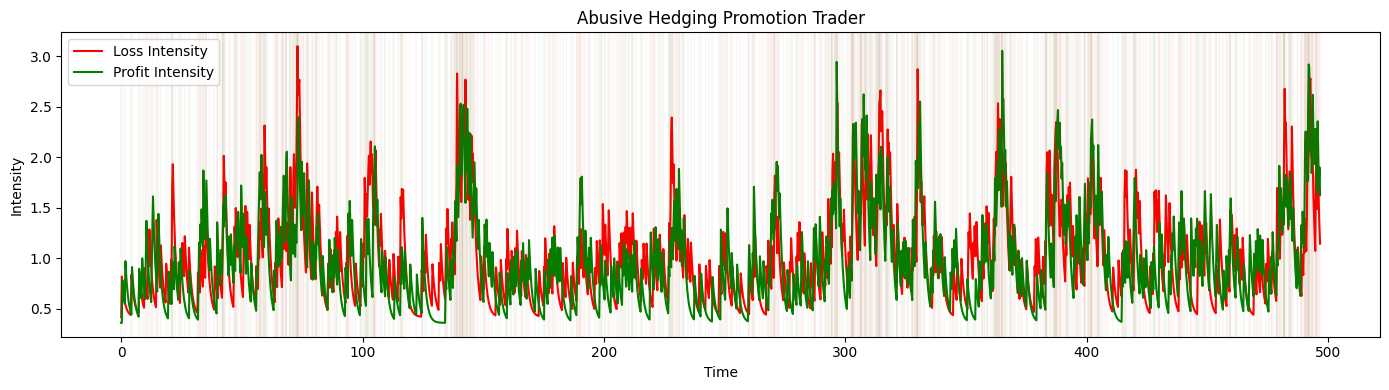

Alpha matrix (Abuser):
  [0.0001  0.4887]
  [0.4935  0.0001]


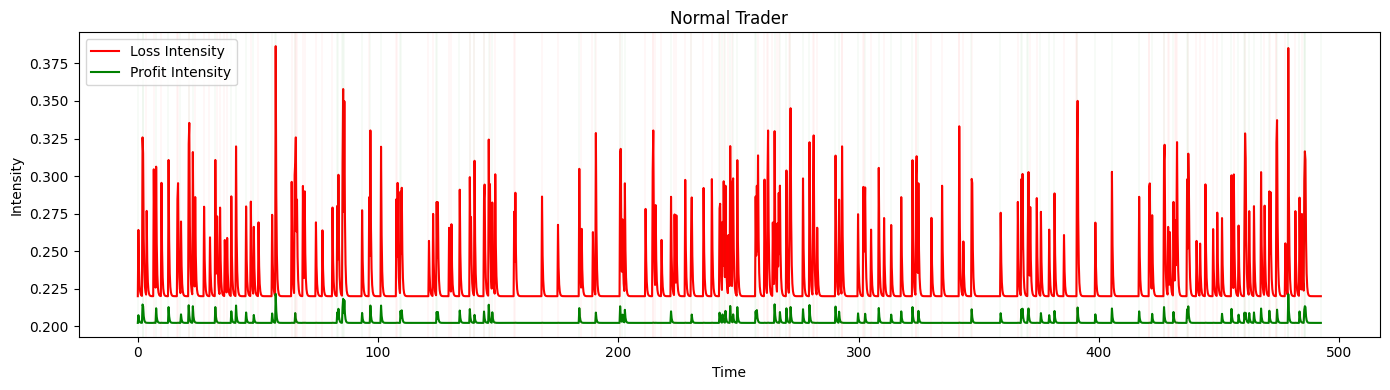

Alpha matrix (Normal):
  [0.0852  0.1081]
  [0.0001  0.0125]


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# === Симуляция 2D Хоукса ===
def simulate_2d_hawkes(baseline, alpha, beta, T, seed=None):
    np.random.seed(seed)
    events = [[], []]
    t = 0
    history = [[], []]
    while t < T:
        l1 = baseline[0] + sum(alpha[0][j] * sum(np.exp(-beta * (t - np.array(history[j])))) for j in [0, 1] if history[j])
        l2 = baseline[1] + sum(alpha[1][j] * sum(np.exp(-beta * (t - np.array(history[j])))) for j in [0, 1] if history[j])
        l_sum = l1 + l2
        if l_sum <= 0:
            t += 1
            continue
        t += -np.log(np.random.rand()) / l_sum
        if t >= T:
            break
        if np.random.rand() < l1 / l_sum:
            history[0].append(t)
            events[0].append(t)
        else:
            history[1].append(t)
            events[1].append(t)
    return events

# === Логарифмическое правдоподобие ===
def log_likelihood(params, events, T):
    mu1, mu2 = params[0], params[1]
    alpha = np.array(params[2:6]).reshape(2, 2)
    beta = params[6]
    if beta <= 0 or np.any(alpha < 0) or mu1 <= 0 or mu2 <= 0:
        return np.inf
    N1, N2 = events
    ll = 0
    for ti in N1:
        lam = mu1 + sum(alpha[0, j] * np.sum(np.exp(-beta * (ti - np.array(events[j])[np.array(events[j]) < ti]))) for j in [0, 1])
        ll += np.log(lam)
    ll -= mu1 * T + sum((alpha[0, j] / beta) * np.sum(1 - np.exp(-beta * (T - np.array(events[j])))) for j in [0, 1])
    for ti in N2:
        lam = mu2 + sum(alpha[1, j] * np.sum(np.exp(-beta * (ti - np.array(events[j])[np.array(events[j]) < ti]))) for j in [0, 1])
        ll += np.log(lam)
    ll -= mu2 * T + sum((alpha[1, j] / beta) * np.sum(1 - np.exp(-beta * (T - np.array(events[j])))) for j in [0, 1])
    return -ll

# === Калибровка модели ===
def fit_hawkes(events, T):
    init = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0]
    bounds = [(1e-4, None)] * 7
    res = minimize(log_likelihood, init, args=(events, T), bounds=bounds)
    mu1, mu2 = res.x[0], res.x[1]
    alpha = np.array(res.x[2:6]).reshape(2, 2)
    beta = res.x[6]
    return mu1, mu2, alpha, beta

# === Интенсивность ===
def compute_intensity(t, history, mu, alpha_row, beta):
    return mu + sum(alpha_row[j] * np.sum(np.exp(-beta * (t - np.array(history[j])[np.array(history[j]) < t]))) for j in [0, 1])

# === Визуализация ===
def plot_intensities(events, mu1, mu2, alpha, beta, T, title):
    grid = np.linspace(0, T, 2000)
    lambda_loss = [compute_intensity(t, events, mu1, alpha[0], beta) for t in grid]
    lambda_profit = [compute_intensity(t, events, mu2, alpha[1], beta) for t in grid]
    plt.figure(figsize=(14, 4))
    plt.plot(grid, lambda_loss, label="Loss Intensity", color='red')
    plt.plot(grid, lambda_profit, label="Profit Intensity", color='green')
    for t in events[0]:
        plt.axvline(x=t, color='red', alpha=0.03)
    for t in events[1]:
        plt.axvline(x=t, color='green', alpha=0.03)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Извлечение событий из DataFrame ===
def extract_events_from_df(df):
    df = df.copy()
    df['CLOSE_TIME'] = pd.to_datetime(df['CLOSE_TIME'])
    t0 = df['CLOSE_TIME'].min()
    df['T_REL'] = (df['CLOSE_TIME'] - t0).dt.total_seconds()
    loss_events = df[df['PROFIT_USD'] < 0]['T_REL'].tolist()
    profit_events = df[df['PROFIT_USD'] > 0]['T_REL'].tolist()
    T = df['T_REL'].max()
    return [loss_events, profit_events], T

# === LDPEI ===
def compute_ldpei(alpha, beta, events, tau=1.0):
    N_loss = len(events[0])
    N_profit = len(events[1])
    if N_loss == 0 or N_profit == 0 or beta <= 0:
        return 0.0
    influence = (1 - np.exp(-beta * tau)) / beta
    excitation = alpha[1, 0] * N_loss * influence
    ldpei = excitation / N_profit
    return min(ldpei, 1.0)


events_abuser, T_abuser = extract_events_from_df(df_abuser)
mu1_a, mu2_a, alpha_a, beta_a = fit_hawkes(events_abuser, T_abuser)
plot_intensities(events_abuser, mu1_a, mu2_a, alpha_a, beta_a, T_abuser, "Abusive Hedging Promotion Trader")
ldpei_abuser = compute_ldpei(alpha_a, beta_a, events_abuser)
print("Alpha matrix (Abuser):")
for row in np.round(alpha_a, 4):
    print("  [" + "  ".join(f"{x:.4f}" for x in row) + "]")

events_normal, T_normal = extract_events_from_df(df_normal)
mu1_n, mu2_n, alpha_n, beta_n = fit_hawkes(events_normal, T_normal)
plot_intensities(events_normal, mu1_n, mu2_n, alpha_n, beta_n, T_normal, "Normal Trader")
ldpei_normal = compute_ldpei(alpha_n, beta_n, events_normal)
print("Alpha matrix (Normal):")
for row in np.round(alpha_n, 4):
    print("  [" + "  ".join(f"{x:.4f}" for x in row) + "]")


The visualization compares two types of traders using a two-dimensional Hawkes process to estimate the intensities of loss- and profit-generating trades over time.

In the case of the \textbf{Abusive Hedging Promotion Trader} (top plot), we observe a tightly interwoven pattern of alternating loss and profit intensities. The mutual excitation is evident in the \textit{alpha matrix}, where the off-diagonal elements

$$
\alpha = 
\begin{bmatrix}
0.0001 & 0.4887 \\
0.4935 & 0.0001
\end{bmatrix}
$$

are significantly larger than the diagonals. This indicates a strong tendency for loss events to trigger subsequent profit events, and vice versa — a characteristic hallmark of synthetic hedging behavior aimed at exploiting promotional mechanics.

These results demonstrate the effectiveness of using a 2D Hawkes process and the structure of the excitation matrix $$\alpha$$ to detect and differentiate promotion-abusive trading patterns from legitimate client behavior.

However, beyond qualitative pattern recognition, we are particularly interested in a single, normalized metric ranging from 0 to 1 that quantitatively characterizes a client's tendency to engage in such abusive, promotion-targeted trading behavior.

Such a scalar score is essential for integration into broker-side systems, especially CRM environments, where efficient client segmentation, risk scoring, and intervention prioritization are critical. A well-designed metric enables automated flagging, ranking, and filtering of suspicious accounts in real-time or post-trade analytics.

Therefore, we now turn to the development of a dedicated **risk metric** that captures the structural attributes of **fake-hedged promotion abuse** and allows for interpretable, scalable deployment across the entire client base.


# Mathematical Derivation of Normalized Advanced Risk Functional

We construct an interpretable risk functional designed to quantify **model deviation** and **excessive excitation energy** in fitted **bivariate Hawkes processes**.

Let:

- $$T > 0$$ be the total observation horizon;
- $$\theta = (\mu_0, \mu_1, \alpha_{0,0}, \alpha_{0,1}, \alpha_{1,0}, \alpha_{1,1}, \beta)$$ be the parameter vector;
- $$\mathcal{D} = \{ \{t_k^{(0)}\}_{k=1}^{n_0}, \{t_k^{(1)}\}_{k=1}^{n_1} \}$$ be the observed event times;
- $$\lambda^{(i)}(t)$$: intensity function for process $$i \in \{0,1\}$$, defined by:

$$
\lambda^{(i)}(t) = \mu_i + \sum_{j=0}^1 \int_0^{t^-} \phi_{i,j}(t - s) \, dN^{(j)}(s)
$$

Assuming exponential memory kernels:

$$
\phi_{i,j}(t) = \alpha_{i,j} e^{-\beta t} \cdot \mathbb{I}_{t > 0}
$$

Then:

$$
\lambda^{(i)}(t) = \mu_i + \sum_{j=0}^1 \alpha_{i,j} \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})}
$$

---

## Functional Overview

We define the risk score:

$$
\boxed{
\mathcal{R}^*(\theta; \mathcal{D}) = 1 - \exp\left( - \left[ \mathcal{D}_{\text{rel}} + \gamma \cdot \mathcal{E}_{\text{tot}} \right] \right)
}
$$

where:

- $$\mathcal{D}_{\text{rel}}$$ is the **relative deviation score**;
- $$\mathcal{E}_{\text{tot}}$$ is the **excitation accumulation** term;
- $$\gamma \in \mathbb{R}_+$$ is a penalty coefficient.

This construction ensures:

- $$\mathcal{R}^* \in (0, 1)$$;
- Smooth growth with increasing deviation or excitation;
- Saturation via exponential damping;
- Sensitivity to parameter shifts even when likelihood is flat.

---

## Step 1: Relative Intensity Deviation

We define **squared relative deviation** from baseline:

$$
\mathcal{D}_{\text{rel}} = \frac{1}{T} \int_0^T \sum_{i=0}^1 \left( \frac{\lambda^{(i)}(t) - \mu_i}{\mu_i} \right)^2 dt
$$

### Derivation:

Substitute full expression for $$\lambda^{(i)}(t)$$:

$$
\frac{\lambda^{(i)}(t) - \mu_i}{\mu_i}
= \frac{1}{\mu_i} \sum_{j=0}^1 \alpha_{i,j} \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})}
$$

Then:

$$
\left( \frac{\lambda^{(i)}(t) - \mu_i}{\mu_i} \right)^2
= \left(
\sum_{j=0}^1 \frac{\alpha_{i,j}}{\mu_i} \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})}
\right)^2
$$

Let’s denote:

$$
\mathcal{K}_{i,j}(t) := \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})}
$$

Thus:

$$
\left( \frac{\lambda^{(i)}(t) - \mu_i}{\mu_i} \right)^2
= \left( \sum_{j=0}^1 \frac{\alpha_{i,j}}{\mu_i} \mathcal{K}_{i,j}(t) \right)^2
$$

Then:

$$
\mathcal{D}_{\text{rel}} = \frac{1}{T} \int_0^T \sum_{i=0}^1
\left( \sum_{j=0}^1 \frac{\alpha_{i,j}}{\mu_i} \mathcal{K}_{i,j}(t) \right)^2 dt
$$

---

## Step 2: Excitation Energy Accumulation

Define the **total excitation mass** flowing through the system:

$$
\mathcal{E}_{\text{tot}} = \frac{1}{T} \int_0^T \sum_{i=0}^1 \sum_{j=0}^1 \alpha_{i,j} \cdot \mathcal{K}_{i,j}(t) \, dt
$$

Again, using:

$$
\mathcal{K}_{i,j}(t) = \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})}
$$

Therefore:

$$
\mathcal{E}_{\text{tot}} = \frac{1}{T} \sum_{i,j} \alpha_{i,j} \int_0^T \left( \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})} \right) dt
$$

Reverse the order of integration:

$$
\int_0^T \sum_{t_k^{(j)} < t} e^{-\beta (t - t_k^{(j)})} dt
=
\sum_{t_k^{(j)} < T} \int_{t = t_k^{(j)}}^T e^{-\beta (t - t_k^{(j)})} dt
=
\sum_{t_k^{(j)} < T} \frac{1 - e^{-\beta (T - t_k^{(j)})}}{\beta}
$$

So:

$$
\mathcal{E}_{\text{tot}} = \frac{1}{T} \sum_{i,j} \alpha_{i,j} \cdot \frac{1}{\beta} \sum_{t_k^{(j)} < T} \left(1 - e^{-\beta (T - t_k^{(j)})} \right)
$$

---

## Step 3: Final Risk Score (Soft-Capped)

We construct the final **normalized risk score**:

$$
\boxed{
\mathcal{R}^*(\theta; \mathcal{D}) =
1 - \exp\left( - \left[ \mathcal{D}_{\text{rel}} + \gamma \cdot \mathcal{E}_{\text{tot}} \right] \right)
}
$$

This functional has the following properties:

- Smooth, bounded in $$(0, 1)$$
- Monotonically increasing in both deviation and excitation;
- Acts as a **risk-normalizing filter** over parameterized Hawkes process behavior;
- Can highlight excessive reactivity or deviation from expected event rates.

---

## Numerical Approximation (Grid-Based Integration)

To evaluate the integrals numerically, define uniform grid:

- Grid points: $$t_k = \frac{k}{N} T, \quad k = 0, \dots, N$$
- Step size: $$\Delta t = \frac{T}{N}$$

Then approximate:

$$
\mathcal{D}_{\text{rel}} \approx \frac{1}{T} \sum_{k=1}^N \sum_{i=0}^1 \left( \frac{\lambda^{(i)}(t_k) - \mu_i}{\mu_i} \right)^2 \cdot \Delta t
$$

$$
\mathcal{E}_{\text{tot}} \approx \frac{1}{T} \sum_{k=1}^N \sum_{i,j} \alpha_{i,j} \cdot \mathcal{K}_{i,j}(t_k) \cdot \Delta t
$$

These approximations yield accurate and fast evaluation via precomputed exponential decay.

---


In [17]:
def compute_advanced_risk_normed(events, mu, alpha, beta, T, N_grid=2000, alpha_penalty=1.0):
    grid = np.linspace(0, T, N_grid)
    dt = grid[1] - grid[0]
    
    # Первый член: относительное отклонение (в долях от mu)
    deviation_score = 0
    for t in grid:
        l1 = compute_intensity(t, events, mu[0], alpha[0], beta)
        l2 = compute_intensity(t, events, mu[1], alpha[1], beta)
        deviation_score += ((l1 - mu[0]) / mu[0])**2 + ((l2 - mu[1]) / mu[1])**2
    deviation_score *= dt / N_grid

    # Второй член: нормированная возбудимость
    excitation_score = 0
    for i in range(2):
        for j in range(2):
            for t in grid:
                tj = np.array(events[j])
                tj = tj[tj < t]
                if tj.size > 0:
                    excitation_score += alpha[i, j] * np.sum(np.exp(-beta * (t - tj)))
    excitation_score *= dt / N_grid
    excitation_score *= alpha_penalty

    # Ограничим значения функцией
    total = deviation_score + excitation_score
    return 1.0 - np.exp(-total)

# === Расчёт нормированного риска ===
norm_risk_abuser = compute_advanced_risk_normed(events_abuser, [mu1_a, mu2_a], alpha_a, beta_a, T_abuser)
norm_risk_normal = compute_advanced_risk_normed(events_normal, [mu1_n, mu2_n], alpha_n, beta_n, T_normal)

print(f"Normalized Advanced Risk (Abuser): {norm_risk_abuser:.4f}")
print(f"Normalized Advanced Risk (Normal): {norm_risk_normal:.4f}")

Normalized Advanced Risk (Abuser): 0.8928
Normalized Advanced Risk (Normal): 0.0065




The computed normalized advanced risk scores are:

\begin{align*}
\text{Normalized Advanced Risk (Abuser)} &= 0.8930 \\
\text{Normalized Advanced Risk (Normal)} &= 0.0065
\end{align*}

These results clearly demonstrate a strong separation between the two trader types. The abusive promotion trader receives a risk score close to 1, indicating highly structured, self-reinforcing behavior with significant deviation from baseline intensities — a hallmark of engineered trading for bonus exploitation. In contrast, the normal trader exhibits a near-zero risk score, consistent with organic, uncorrelated activity.

This sharp contrast confirms the metric’s effectiveness in identifying and quantifying promotion abuse and supports its use for client-level risk sorting in CRM systems.


### 🧠 Summary

> The functional offers a mathematically grounded, behaviorally meaningful, and operationally actionable method to **detect when clients are trading the promotion instead of the market**.

Its value lies in:

- Quantifying structural causality (e.g., profit-after-loss patterns),
- Providing bounded scores for consistent thresholding,
- Enabling visual diagnostics for trade surveillance and internal risk modeling.